In [1]:
# Library imports:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
full_df = pd.read_csv('imdb_subset_100_10strats')
GDS = full_df['gender diversity score']
SS = full_df['sentiment_score']

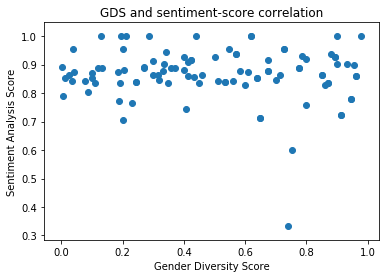

In [3]:
# Plot some stuff:
%matplotlib inline
plt.title("GDS and sentiment-score correlation") 
plt.scatter(GDS,SS) 
plt.xlabel('Gender Diversity Score')
plt.ylabel('Sentiment Analysis Score')
plt.show()

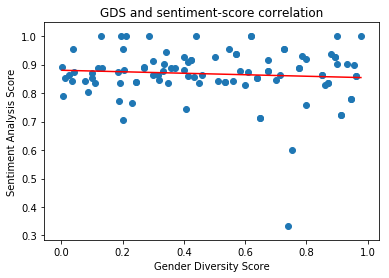

In [4]:
# Try linear regression:

#stats.pearsonr(GDS, sentiment_scores)
slope, intercept, r_value, p_value, std_err = stats.linregress(GDS, SS)
plt.title("GDS and sentiment-score correlation") 
plt.scatter(GDS,SS)
plt.plot(GDS,GDS*slope+intercept,'r-')
plt.xlabel('Gender Diversity Score')
plt.ylabel('Sentiment Analysis Score')
plt.show()

In [ ]:
# Nonlinear LSF
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c
popt, pcov = curve_fit(func, GDS, SS)

plt.plot(GDS,func(GDS, *popt),'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.scatter(GDS,SS, label='all movies')
plt.xlabel('GDS')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()